### Using Jupyter magics for autoreload

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### Fast AI imports and other necessary constants

In [3]:
from fastai import *
from pathlib import Path
import pandas as pd
import xml.etree.ElementTree as ET

### Batch Size

In [4]:
bs = 64

### Path

In [5]:
PATH = '/home/anurag/work/aicity2020/AIC20_track2/AIC20_ReID/data'

In [6]:
data_path = Path(PATH)
train_data_path = data_path/'train'
data_path.ls()

[PosixPath('/home/anurag/work/aicity2020/AIC20_track2/AIC20_ReID/data/train'),
 PosixPath('/home/anurag/work/aicity2020/AIC20_track2/AIC20_ReID/data/ReadMe.txt'),
 PosixPath('/home/anurag/work/aicity2020/AIC20_track2/AIC20_ReID/data/test'),
 PosixPath('/home/anurag/work/aicity2020/AIC20_track2/AIC20_ReID/data/test_track_id.txt'),
 PosixPath('/home/anurag/work/aicity2020/AIC20_track2/AIC20_ReID/data/tool'),
 PosixPath('/home/anurag/work/aicity2020/AIC20_track2/AIC20_ReID/data/query'),
 PosixPath('/home/anurag/work/aicity2020/AIC20_track2/AIC20_ReID/data/AIC2020-DataLicenseAgreement.pdf')]

### Convert the XML file to CSV
> Used an online tool for now, will update and add code to do that later
---

### Load the CSV in Pandas Dataframe and explore the data

In [7]:
colnames = ['_imageName', '_vehicleID', '_cameraID']
df = pd.read_csv(data_path/'train/xml_train.csv',header=0)
df.head(10)

,_imageName,_vehicleID,_cameraID
0,021284.jpg,347,c026
1,022106.jpg,308,c033
2,017633.jpg,5,c002
3,019639.jpg,343,c022
4,030656.jpg,388,c016
5,013137.jpg,424,c027
6,032370.jpg,74,c001
7,008022.jpg,44,c003
8,036507.jpg,5,c004
9,008474.jpg,402,c021


### Set up the dataloader

In [8]:
data = ImageDataBunch.from_csv(train_data_path, folder='image_train', valid_pct=0.2, csv_labels='xml_train.csv',
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

#### Dataloader details
> data.c ==> # of Classes determined by the classifier

> len(data.train_ds) ==> length of Training Set

> len(data.valid_ds) ==> length of Validation Set

In [9]:
data.c, len(data.train_ds), len(data.valid_ds)

(333, 29548, 7387)

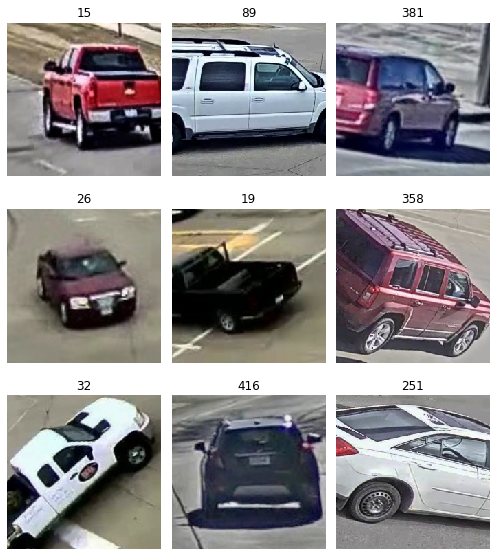

In [10]:
data.show_batch(rows=3, figsize=(7,8))

## Train model

#### Training with ResNet34 to train faster and then will switch to ResNet50 
> top_k_accuracy --> k=5

In [62]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate, 
                                                    accuracy, 
                                                    top_k_accuracy, 
                                                    FBeta(average='micro')])

In [63]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,f_beta,time
0,3.543299,2.245378,0.503452,0.496548,0.746311,0.000000,02:09
1,1.683674,0.875897,0.220387,0.779613,0.930012,0.000000,02:09
2,1.002552,0.444122,0.119805,0.880195,0.970759,0.880195,02:09
3,0.677303,0.273601,0.076756,0.923244,0.983891,0.000000,02:09
4,0.411839,0.186482,0.050629,0.949371,0.989441,0.000000,02:09
5,0.304658,0.135849,0.036551,0.963449,0.991878,0.963449,02:09
6,0.239270,0.115111,0.030865,0.969135,0.993637,0.000000,02:09
7,0.204713,0.110705,0.029241,0.970759,0.993773,0.000000,02:09


In [64]:
learn.save('stage-1')

In [65]:
learn.unfreeze()

In [66]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


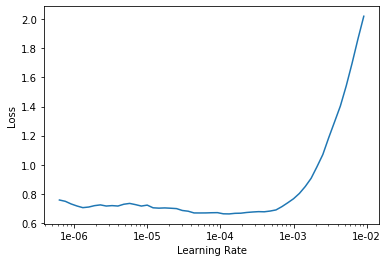

In [47]:
learn.recorder.plot()

In [48]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,f_beta,time
0,0.602539,0.256049,0.059564,0.940436,0.984838,0.940436,01:31
1,0.399827,0.165339,0.040747,0.959253,0.991065,0.959253,01:32
2,0.270169,0.123115,0.030865,0.969135,0.993908,0.969135,01:31
3,0.222564,0.114983,0.027751,0.972249,0.993502,0.972249,01:31


In [49]:
learn.save('stage-2')